In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_size = 5  # no_of_features
layers = [4, 3]  # no. of neurons in 1st and 2nd layer
output_class = 2

# Multilayer Neural Network

In [3]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa / np.sum(e_pa, axis=1, keepdims=True)
    return ans

In [4]:
a = np.array([[10, 20]])
result = softmax(a)
print(result)

[[4.53978687e-05 9.99954602e-01]]


In [5]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)

        model = {}  #Dictionary

        #First Layer
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))

        #Second Layer
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))

        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))

        self.model = model
        self.activation_outputs = None

    def forward(self, x):

        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']

        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2, W3) + b3
        y_ = softmax(z3)

        self.activation_outputs = (a1, a2, y_)
        return y_

    def backward(self, x, y, learning_rate=0.001):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]

        a1, a2, y_ = self.activation_outputs

        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)

        delta2 = (1 - np.square(a2)) * np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)

        delta1 = (1 - np.square(a1)) * np.dot(delta2, W2.T)
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis=0)

        #Update the Model Parameters using Gradient Descent
        self.model["W1"] -= learning_rate * dw1
        self.model['b1'] -= learning_rate * db1

        self.model["W2"] -= learning_rate * dw2
        self.model['b2'] -= learning_rate * db2

        self.model["W3"] -= learning_rate * dw3
        self.model['b3'] -= learning_rate * db3

    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)

    def summary(self):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, y_ = self.activation_outputs

        print("W1 ", W1.shape)
        print("A1 ", a1.shape)

        print("W2 ", W2.shape)
        print("A2 ", a2.shape)

        print("W3 ", W3.shape)
        print("Y_ ", y_.shape)

In [6]:
def loss(y_oht, p):
    l = -np.mean(y_oht * np.log(p))
    return l


def one_hot(y, depth):

    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [7]:
def train(X, Y, model, epochs, learning_rate, logs=True):
    training_loss = []

    classes = 2
    Y_OHT = one_hot(Y, classes)

    for ix in range(epochs):

        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        training_loss.append(l)
        model.backward(X, Y_OHT, learning_rate)
        # model.forward()

        if (logs and ix%50==0):
            print("Epoch %d Loss %.4f" % (ix, l))

    return training_loss

In [8]:
def plot_decision_boundary(model, X, y, cmap=plt.cm.jet):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    plt.show()

# Dataset

In [9]:
# Generate random data samples
np.random.seed(10)
num_samples = 1000
num_features = 5
X = np.random.randn(num_samples, num_features)
Y = np.random.randint(0, 2, num_samples)

In [10]:
X

array([[ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597],
       [-0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021],
       [ 0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013],
       ...,
       [-1.2924998 , -0.10768601, -0.13185048,  1.21725896, -0.76590725],
       [-0.60274058, -1.87806495, -0.77239814,  0.21401293, -0.02636137],
       [ 1.15352129, -0.71904634, -1.44255419,  0.38838999,  0.70120839]])

In [11]:
Y 

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [12]:
model = NeuralNetwork(input_size=5, layers=[4, 3], output_size=2)

In [13]:
model.forward([X]).shape

(1, 1000, 2)

In [14]:
model.summary()

W1  (5, 4)
A1  (1, 1000, 4)
W2  (4, 3)
A2  (1, 1000, 3)
W3  (3, 2)
Y_  (1, 1000, 2)


In [15]:
losses = train(X, Y, model, 500, 0.001)
# print(losses)

Epoch 0 Loss 0.3925
Epoch 50 Loss 0.3440
Epoch 100 Loss 0.3429
Epoch 150 Loss 0.3420
Epoch 200 Loss 0.3411
Epoch 250 Loss 0.3402
Epoch 300 Loss 0.3391
Epoch 350 Loss 0.3380
Epoch 400 Loss 0.3370
Epoch 450 Loss 0.3363


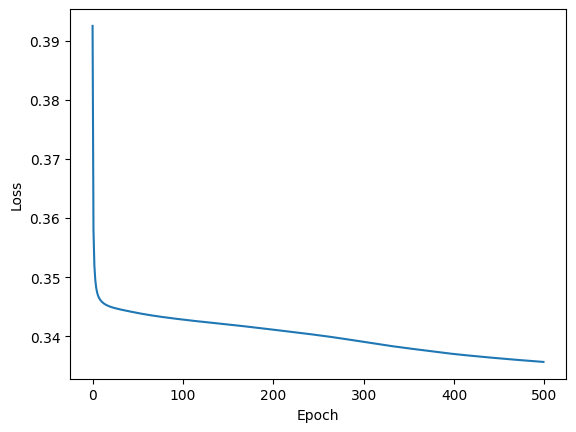

In [16]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

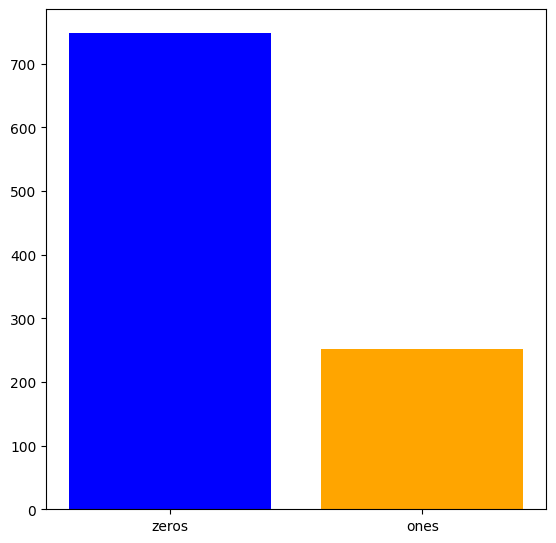

In [17]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
labels1 = ['zeros', 'ones']
lab_colors = ['blue', 'orange']
lab_counts = np.unique(model.predict(X), return_counts=True)[1]
ax.bar(labels1, lab_counts, color=lab_colors)
plt.show()

In [18]:
np.unique(model.predict(X), return_counts=True)

(array([0, 1], dtype=int64), array([748, 252], dtype=int64))

In [19]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs == Y) / Y.shape[0]
print(f"Training accuracy is {training_accuracy*100}%")

Training accuracy is 56.99999999999999%
